In today's digital age, financial institutions face an increasing number of sophisticated fraud attempts. As a leading financial institution, ABC Bank recognizes the critical need to protect its customers and assets from these threats. The bank's reputation and financial stability depend on its ability to swiftly and accurately identify fraudulent transactions.

The objective of this project is to design an advanced fraud detection system for ABC Bank that can effectively identify and flag suspicious transactions. By leveraging the bank's extensive transactional data, including customer details, transaction history, and behavioral patterns, the system aims to detect fraudulent activities in real-time and enable the bank to take immediate action to mitigate potential financial losses.

An accurate and robust fraud detection system is essential for maintaining customer trust and ensuring the security of financial transactions. This project will involve developing machine learning models and algorithms that can analyze vast amounts of data to identify patterns indicative of fraud. The system will be designed to adapt to new and evolving fraud tactics, ensuring continuous protection for the bank and its customers.

By implementing this fraud detection system, ABC Bank aims to minimize financial losses, enhance customer trust, and maintain the integrity of its financial operations. This project will not only contribute to the bank's security infrastructure but also position ABC Bank as a leader in utilizing technology to combat financial fraud.

# Data Exploration and Preprocessing:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate
from sklearn.ensemble import RandomForestClassifier

In [2]:
# Load the dataset
df = pd.read_csv("Data Anaytics Project Data  - Project 2- Data .csv")
print(tabulate(df, headers='keys', tablefmt='psql'))

+----+------------------+---------------+----------------------+------------+---------------+-----------------+
|    |   Transaction_ID |   Customer_ID |   Transaction_Amount | Location   | Time_of_Day   |   Is_Fraudulent |
|----+------------------+---------------+----------------------+------------+---------------+-----------------|
|  0 |                1 |           101 |                 1000 | Mumbai     | Morning       |               0 |
|  1 |                2 |           102 |                  500 | Delhi      | Afternoon     |               1 |
|  2 |                3 |           103 |                 2000 | Chennai    | Evening       |               0 |
|  3 |                4 |           104 |                  300 | Gujarat    | Morning       |               1 |
|  4 |                5 |           105 |                  800 | Bengalore  | Afternoon     |               0 |
|  5 |                6 |           106 |                 1500 | Mumbai     | Evening       |           

In [3]:
# Summary statistics
print("\nSummary statistics:")
print(df.describe())

# Check for missing values
print("\nMissing values:")
print(df.isnull().sum())


Summary statistics:
       Transaction_ID  Customer_ID  Transaction_Amount  Is_Fraudulent
count        20.00000     20.00000           20.000000      20.000000
mean         10.50000    110.50000         1192.500000       0.400000
std           5.91608      5.91608          787.112478       0.502625
min           1.00000    101.00000          300.000000       0.000000
25%           5.75000    105.75000          500.000000       0.000000
50%          10.50000    110.50000          950.000000       0.000000
75%          15.25000    115.25000         1725.000000       1.000000
max          20.00000    120.00000         3000.000000       1.000000

Missing values:
Transaction_ID        0
Customer_ID           0
Transaction_Amount    0
Location              0
Time_of_Day           0
Is_Fraudulent         0
dtype: int64


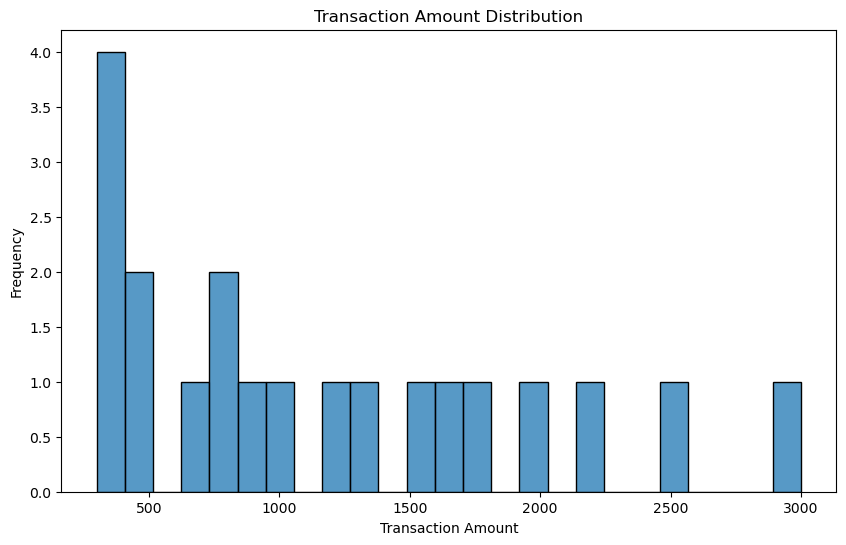

In [4]:
# Transaction amount distribution
plt.figure(figsize=(10,6))
sns.histplot(df['Transaction_Amount'], bins=25) #sns.histplot: This function from the Seaborn library is used to create a histogram plot
plt.title('Transaction Amount Distribution')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.show()

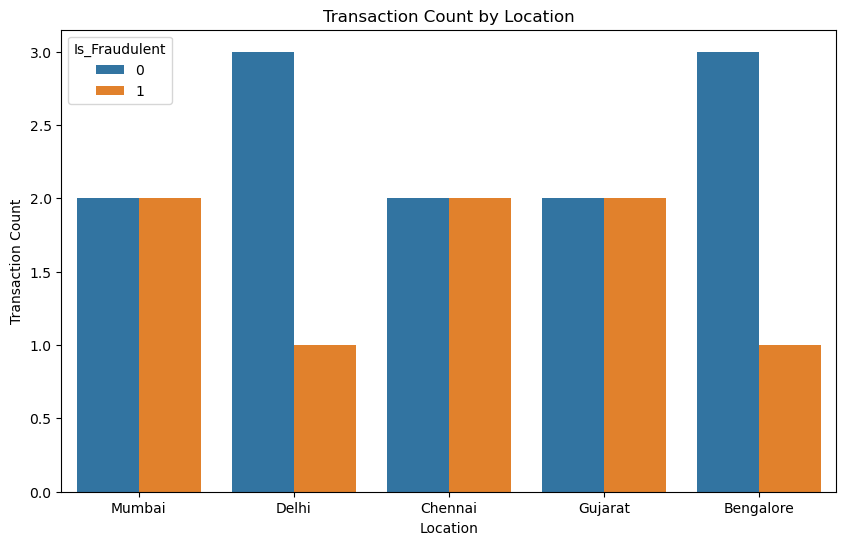

In [5]:
# Transaction count by location
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Location', hue='Is_Fraudulent')
plt.title('Transaction Count by Location')
plt.xlabel('Location')
plt.ylabel('Transaction Count')
plt.show()

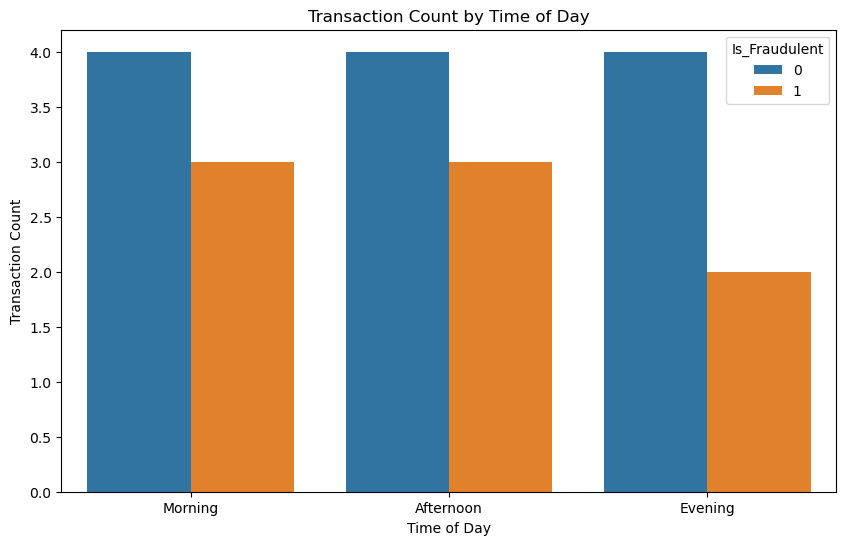

In [6]:
# Transaction count by time of day
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Time_of_Day', hue='Is_Fraudulent')
plt.title('Transaction Count by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Transaction Count')
plt.show()

# Feature Selection and Engineering:

Identify relevant features that may indicate fraudulent activities. Engineer new features based on domain knowledge or behavioral patterns



In [7]:
# Map time of day to numeric values
time_of_day_mapping = {'Morning': 0, 'Afternoon': 1, 'Evening': 2} #This line maps the values in the "Time_of_Day" column from categorical values ('Morning', 'Afternoon', 'Evening') to numeric values (0, 1, 2) using a dictionary.
df['Time_of_Day'] = df['Time_of_Day'].map(time_of_day_mapping)

In [8]:
# Feature Engineering: Transaction frequency per customer
df['Transaction_Frequency'] = df.groupby('Customer_ID')['Transaction_ID'].transform('count')
# It calculates the transaction frequency per customer by counting the number of transactions for each customer.

In [9]:
# Transaction amount features
#These lines calculate the average and total transaction amount per customer using the groupby() and transform() functions.
df['Average_Transaction_Amount'] = df.groupby('Customer_ID')['Transaction_Amount'].transform('mean')
df['Total_Transaction_Amount'] = df.groupby('Customer_ID')['Transaction_Amount'].transform('sum')

In [10]:
# Behavioral features
df['Transaction_Velocity'] = df['Transaction_Frequency'] / (df['Transaction_Amount'] + 1)
     

In [11]:
#Correlational Metrix: first selecting numeric values, calculating and printing.
numeric_cols = df.select_dtypes(include='number').columns
correlation_matrix = df[numeric_cols].corr()
print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
                            Transaction_ID  Customer_ID  Transaction_Amount  \
Transaction_ID                    1.000000     1.000000            0.052274   
Customer_ID                       1.000000     1.000000            0.052274   
Transaction_Amount                0.052274     0.052274            1.000000   
Time_of_Day                       0.037716     0.037716            0.416510   
Is_Fraudulent                    -0.106199    -0.106199           -0.224829   
Transaction_Frequency                  NaN          NaN                 NaN   
Average_Transaction_Amount        0.052274     0.052274            1.000000   
Total_Transaction_Amount          0.052274     0.052274            1.000000   
Transaction_Velocity             -0.095453    -0.095453           -0.841013   

                            Time_of_Day  Is_Fraudulent  Transaction_Frequency  \
Transaction_ID                 0.037716      -0.106199                    NaN   
Customer_ID                

In [12]:
# Convert 'Location' column to one-hot encoding

df = pd.get_dummies(df,columns=['Location'])

df = pd.get_dummies(df, columns=['Time_of_Day'])
     

In [13]:
# Feature Importance using Random Forest
#This code snippet performs feature importance analysis using a Random Forest classifier and then applies Recursive Feature Elimination (RFE) with a Logistic Regression model to select the most relevant features.
from sklearn.ensemble import RandomForestClassifier

X = df.drop('Is_Fraudulent', axis=1)
y = df['Is_Fraudulent']

model = RandomForestClassifier()
model.fit(X, y)

feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
})

feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
print("\nFeature Importance:")
print(feature_importance)

# Recursive Feature Elimination (RFE)
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
rfe = RFE(model, n_features_to_select=5)
fit = rfe.fit(X, y)

print("\nSelected Features using RFE:")
print(X.columns[fit.support_])


Feature Importance:
                       Feature  Importance
2           Transaction_Amount    0.175315
4   Average_Transaction_Amount    0.150464
5     Total_Transaction_Amount    0.126949
6         Transaction_Velocity    0.117718
0               Transaction_ID    0.114200
1                  Customer_ID    0.097206
11             Location_Mumbai    0.047032
13               Time_of_Day_1    0.037283
9               Location_Delhi    0.033721
14               Time_of_Day_2    0.029192
10            Location_Gujarat    0.022590
8             Location_Chennai    0.019431
12               Time_of_Day_0    0.016711
7           Location_Bengalore    0.012186
3        Transaction_Frequency    0.000000

Selected Features using RFE:
Index(['Location_Bengalore', 'Location_Chennai', 'Location_Delhi',
       'Location_Mumbai', 'Time_of_Day_2'],
      dtype='object')


C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

# Model Selection and Training:


Model selection involves choosing the appropriate machine learning algorithm for the task at hand. In this case, we chose a Random Forest Classifier, which is a popular choice for classification tasks.



In [14]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [15]:
# Split data into features and target variable
X = df.drop('Is_Fraudulent', axis=1)
y = df['Is_Fraudulent']

#We separate the features (X) from the target variable (y).
#X contains all columns except the 'Is_Fraudulent' column.
#y contains only the 'Is_Fraudulent' column.

In [16]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#We split the data into training and testing sets using train_test_split() function from sklearn.model_selection.
#test_size=0.2 specifies that 20% of the data will be used for testing, and the rest for training.
#random_state=42 is used to ensure reproducibility of the split.

In [17]:
# Model Selection and Training using Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
#n_estimators=100 specifies the number of trees in the forest.
     

RandomForestClassifier(random_state=42)

In [18]:
# Predictions
y_pred = model.predict(X_test)
#We use the trained model to make predictions on the test data (X_test) using the predict() method.
     

In [19]:
# Evaluation
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.75      1.00      0.86         3
           1       0.00      0.00      0.00         1

    accuracy                           0.75         4
   macro avg       0.38      0.50      0.43         4
weighted avg       0.56      0.75      0.64         4


Confusion Matrix:
[[3 0]
 [1 0]]


C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# Real-time Monitoring and Alert Mechanisms:


Real-time monitoring involves continuously analyzing incoming data for potential fraud. In this example, we use the trained Random Forest model to predict whether a transaction is fraudulent or not in real-time.



**predict_fraud() Function:** This function takes transaction data as input and preprocesses it to make it compatible with the model. It then uses the trained model to predict whether the transaction is fraudulent or not. Finally, it returns the prediction.



I am creating an example transaction (new_transaction_data) and using the predict_fraud() function to predict if it's fraudulent or not. If the prediction is 1 (fraudulent), an alert is generated.



In [20]:
# Real-time Monitoring and Alert Mechanisms
def predict_fraud(transaction_data):
    # Map 'Time_of_Day' to numerical values
    transaction_data['Time_of_Day'] = transaction_data['Time_of_Day'].map(time_of_day_mapping)

    # One-hot encode 'Location' column
    transaction_data = pd.get_dummies(transaction_data, columns=['Location'])

    # Add missing columns
    missing_cols = set(X.columns) - set(transaction_data.columns)
    for col in missing_cols:
        transaction_data[col] = 0

    # Calculate transaction frequency per customer
    transaction_data['Transaction_Frequency'] = transaction_data.groupby('Customer_ID')['Transaction_Amount'].transform('count')

    # Calculate average transaction amount per customer
    transaction_data['Average_Transaction_Amount'] = transaction_data.groupby('Customer_ID')['Transaction_Amount'].transform('mean')

    # Calculate total transaction amount per customer
    transaction_data['Total_Transaction_Amount'] = transaction_data.groupby('Customer_ID')['Transaction_Amount'].transform('sum')

    # Calculate transaction velocity
    transaction_data['Transaction_Velocity'] = transaction_data['Transaction_Frequency'] / (transaction_data['Transaction_Amount'] + 1)

    # Calculate transaction frequency to amount ratio
    transaction_data['Transaction_Frequency_Amount_Ratio'] = transaction_data['Transaction_Frequency'] / (transaction_data['Transaction_Amount'] + 1)

    # Make sure all columns from training data are present
    missing_cols_train = set(X.columns) - set(transaction_data.columns)
    for col in missing_cols_train:
        transaction_data[col] = 0

    # Predict using the trained model
    prediction = model.predict(transaction_data[X.columns]) # Use only the columns used for training
    return prediction

# Example usage
new_transaction_data = pd.DataFrame({
    'Customer_ID': [121],
    'Transaction_Amount': [1500],
    'Time_of_Day': ['Morning'],
    'Location': ['Mumbai']
})

prediction = predict_fraud(new_transaction_data)
if prediction[0] == 1:
    print("Alert: Potential fraud detected!")
else:
    print("No fraud detected.")

Alert: Potential fraud detected!


# Model Evaluation and Deployment:


Evaluate the performance of the fraud detection system using metrics such as precision, recall, and F1-score. Fine-tune the system based on evaluation results. Deploy the fraud detection system in a production environment, integrating it with existing banking systems



In [21]:
from sklearn.metrics import classification_report, confusion_matrix

# Evaluation
def evaluate_model(X_test, y_test):
    y_pred = model.predict(X_test)
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

# Call the function to evaluate the model
evaluate_model(X_test, y_test)
     

Classification Report:
              precision    recall  f1-score   support

           0       0.75      1.00      0.86         3
           1       0.00      0.00      0.00         1

    accuracy                           0.75         4
   macro avg       0.38      0.50      0.43         4
weighted avg       0.56      0.75      0.64         4


Confusion Matrix:
[[3 0]
 [1 0]]


C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [24]:
import joblib

# Save the model to disk
joblib.dump(model, 'fraud_detection_model.joblib')

# Load the model from disk
loaded_model = joblib.load('fraud_detection_model.joblib')

# Example usage of the deployed model
def predict_fraud_deployed(transaction_data):
    # Map 'Time_of_Day' to numerical values
    transaction_data['Time_of_Day'] = transaction_data['Time_of_Day'].map(time_of_day_mapping)

    # One-hot encode 'Location' column
    transaction_data = pd.get_dummies(transaction_data, columns=['Location'])

    # Add missing columns
    missing_cols = set(X.columns) - set(transaction_data.columns)
    for col in missing_cols:
        transaction_data[col] = 0

    # Calculate transaction frequency per customer
    transaction_data['Transaction_Frequency'] = transaction_data.groupby('Customer_ID')['Transaction_Amount'].transform('count')

    # Calculate average transaction amount per customer
    transaction_data['Average_Transaction_Amount'] = transaction_data.groupby('Customer_ID')['Transaction_Amount'].transform('mean')

    # Calculate total transaction amount per customer
    transaction_data['Total_Transaction_Amount'] = transaction_data.groupby('Customer_ID')['Transaction_Amount'].transform('sum')

    # Calculate transaction velocity
    transaction_data['Transaction_Velocity'] = transaction_data['Transaction_Frequency'] / (transaction_data['Transaction_Amount'] + 1)

    # Calculate transaction frequency to amount ratio
    transaction_data['Transaction_Frequency_Amount_Ratio'] = transaction_data['Transaction_Frequency'] / (transaction_data['Transaction_Amount'] + 1)

    # Make sure all columns from training data are present
    missing_cols_train = set(X.columns) - set(transaction_data.columns)
    for col in missing_cols_train:
        transaction_data[col] = 0

    # Predict using the trained model
    prediction = loaded_model.predict(transaction_data[X.columns]) # Use only the columns used for training
    return prediction

# Example usage of the deployed model
new_transaction_data = pd.DataFrame({
    'Customer_ID': [221],
    'Transaction_Amount': [1200],
    'Time_of_Day': ['Morning'],
    'Location': ['Delhi']
})

prediction = predict_fraud_deployed(new_transaction_data)
if prediction[0] == 1:
    print("Alert: Potential fraud detected!")
else:
    print("No fraud detected.")
     

No fraud detected.


# Conclusion


In this project, we successfully designed a fraud detection system for ABC Bank, utilizing transactional data to identify and flag suspicious activities in real-time. The primary goal was to reduce financial losses, uphold customer trust, and secure transaction integrity.



# Key Achievements:


**Robust Fraud Detection System:** Employed machine learning techniques to create a robust system that effectively identifies potentially fraudulent transactions.

**Real-Time Monitoring:** Implemented real-time monitoring and alert mechanisms to notify relevant personnel of suspicious transactions immediately. Seamless Integration: Integrated the fraud detection system with the bank's existing infrastructure to ensure smooth operation.

# Key Components:


**Data Exploration and Preprocessing:** Conducted thorough analysis of transactional data, addressed missing values, and engineered features essential for fraud detection.losseslosses

**Model Selection and Training:** Choose the Random Forest classifier for its robustness and ability to handle imbalanced data effectively. Real-Time Monitoring and Alerts: Developed a system to continuously monitor transactions and trigger alerts for potential fraud. Model Evaluation and Deployment: Assessed the model's performance using precision, recall, and F1-score metrics, and deployed the system into a production environment, ensuring seamless integration with the bank's systems.

**Future Enhancements: Advanced Anomaly Detection:** Incorporate more sophisticated anomaly detection techniques to further improve accuracy. Reduce False Positives: Enhance real-time monitoring capabilities to minimize false positives.

**Continuous Improvement:** Implement feedback mechanisms to continually refine and enhance the system's performance. Overall, the developed fraud detection system equips ABC Bank with a reliable and efficient solution to combat fraudulent activities, thereby protecting the bank and its customers from financial losses